# Случайность в вероятности и на практике

О подходах к понятию случайности: 

Н.К. Верещагин, В.А. Успенский, А. Шень. Колмогоровская сложность и алгоритмическая случайность. 
https://www.mccme.ru/free-books/shen/kolmbook.pdf

А.Н. Ширяев. Случайность в вероятности (доклад на семинаре кафедры теории веротяностей). http://www.mathnet.ru:8080/PresentFiles/21897/bsk_2018_10_17_shiryaev_an_randomness_in_probability_slides.pdf

## Генераторы случайных чисел

Что происходит при вызове, напрмер, ```np.random.rand()```?

Как устроен источник случайной последовательности?

![img](https://cdn.ablebits.com/_img-blog/random-generator/random-generator.png)

Рассмотрим простой и популрный алгоритм - Linear congruential generator (LCG). При вызове функции ```rand()``` в C/C++ происзодит обращение именно к LCG.

Linear congruential generator производит последовательность:
$$ z_{i+1} = (az_i + c) \mod m $$

Число $z_0$ называется *seed* и обеспечивает воспроизводимость последовательности “случайных” чисел.

Напишем функцию, которая реализует LCG:

In [ ]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

Выведем несколько первых элементов последовательности:

In [ ]:
[rng() for i in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

Выбор параметров $m$, $a$ и $c$ существенно влияет на качество последовательности. Если параметры выбрать наобум, это может привести к неожиданным последствиям:

In [ ]:
def rng(m=97, a=5, c=0):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 7

random = [rng() for i in range(1000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[0.36082474226804123,
 0.8041237113402062,
 0.020618556701030927,
 0.10309278350515463,
 0.5154639175257731,
 0.5773195876288659,
 0.8865979381443299,
 0.4329896907216495,
 0.16494845360824742,
 0.8247422680412371]

Гистограмма распределения похожа на равномерное:

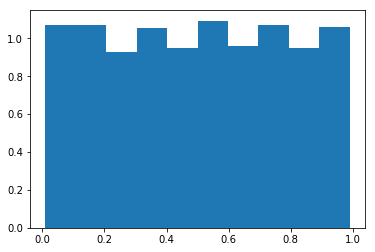

In [ ]:
import matplotlib.pyplot as plt
plt.hist(random, normed=True)
plt.show()

Однако, спектральный тест показывает, что точки располагаются на гиперплоскостях, что плохо согласуется с предствалением о случайности:

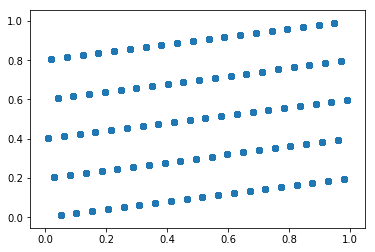

In [ ]:
plt.scatter(random[1:], random[:-1])
plt.show()

Более аккуратный выбор параметров приводит с более "случайному" распределению:

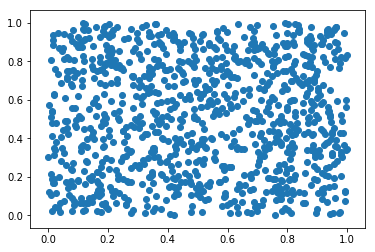

In [ ]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

random = [rng() for i in range(1000)]
plt.scatter(random[1:], random[:-1])
plt.show()

Существует набор тестов для проверки "случайности". Например, тесты [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).

Больше методов генерации собрано [здесь](https://en.wikipedia.org/wiki/List_of_random_number_generators).

Сюжет про динамические системы и переход к хаосу https://www.youtube.com/watch?v=ovJcsL7vyrk&feature=youtu.be

## Генерация выборки из заданного распределения

Допустим, у нас есть генератор случайных числе из отрезка [0, 1]. Как получить выборку из нового распределения $F$?



### Задача
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.


0:00:00.031222


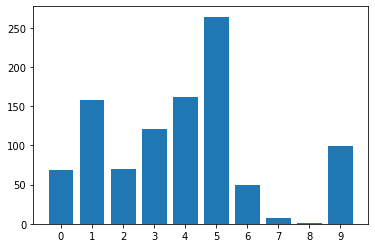

In [7]:
# Solution here
import numpy as np 
import matplotlib.pyplot as plt 
from datetime import datetime
import random 
start=datetime.now()

di=np.zeros(10) 
weight=np.arange(10) 
weight=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]) 
weight=weight/2.009 
G=np.zeros(10) 
G[0]=weight[0] 
for i in range(9): 
    G[i+1]=G[i]+weight[i+1] 
weight=G 
#print(G) 

for i in range (1000): 
    d=random.random() 
    j=np.where(weight-d>=0) 
    q=np.array(j).min() 
    di[q]=di[q]+1 
    

print (datetime.now()-start)

plt.bar(np.arange(10),di)
plt.xticks(np.arange(10))
plt.show()

0:00:00.027431


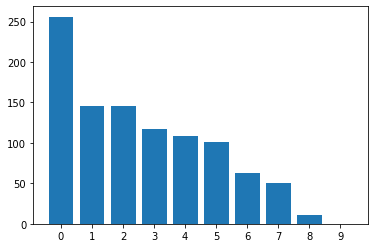

In [11]:
start=datetime.now()
di=np.zeros(10) 
weight=np.arange(10) 
weight=np.array([0.54, 0.31, 0.3, 0.24, 0.2, 0.167, 0.12, 0.111, 0.02, 0.001]) 
weight=weight/2.009 
G=np.zeros(10) 
G[0]=weight[0] 
for i in range(9): 
    G[i+1]=G[i]+weight[i+1] 
weight=G 
#print(G) 

for i in range (1000): 
    d=random.random() 
    j=np.where(weight-d>=0) 
    q=np.array(j).min() 
    di[q]=di[q]+1 
    

print (datetime.now()-start)
plt.bar(np.arange(10),di)
plt.xticks(np.arange(10))
plt.show()

### Inverse transform method

В следующем предложении заключается идея метода *inverse transform*:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)

### Задача
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

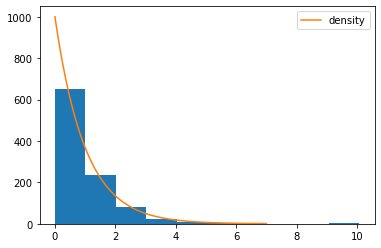

In [24]:
# Solution here
import math

def f (x,s): 
    return - (math.log(1-x))/s

Sample=np.zeros(1000) 
l=1 
X=np.linspace(0, 7, 256) 
for i in range (1000): 
    d=random.random() 
    Sample[i]=f(d,l) 
 
T=1000*np.exp(-X) 
plt.hist(Sample) 
plt.plot(X,T, label='density') 
plt.legend() 
plt.show()

### Rejection sampling (Accept-reject method)

Идея метода: сэмплить из распределения, из которого умеем, а затем отбирать точки, которые следуют нужному распределению. Картинка иллюстрирует идею метода:
<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>
 

### Задача
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

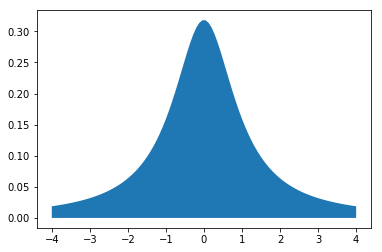

In [ ]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

Выборка нужная просто потому что выбираются ровно те значения, которые под него подходят 

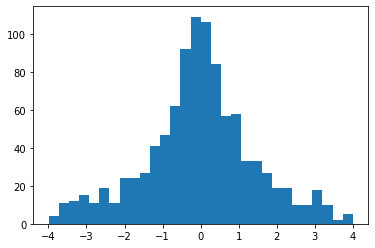

In [47]:
# Solution here
import math

def f1 (x):
    return (1/(math.pi*(1 + x*x)))

x = np.zeros(1000)
i = 0
while i<1000: 
    d=random.uniform(-4,4) 
    y=random.random() 
    if(y < f1(d)): 
        x[i]=d
        i=i+1
plt.hist(x,30)
plt.show()

##  Coordinate transformation method

Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива -  попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.

### Задача
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора. 

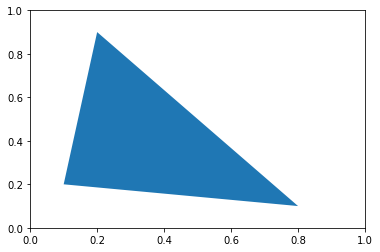

In [ ]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

0.7071067811865476 0.7071067811865476


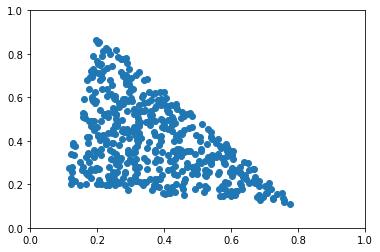

In [89]:
# Solution here
import math
a = 0.1*math.sqrt((1-2)*(1-2)+(2-9)*(2-9))
b = 0.1*math.sqrt((8-1)*(8-1) + (1-2)*(1-2))
#b = 0.1*math.sqrt((1-8)^2 + (2-1)^2)
print(a,b)
x = np.zeros(1000).reshape(500,2)
#print(x)
for i in range (500):
    d = random.random()
    v = random.random()
    if ((v + d) >= 1):
        x[i,0] = (1-d)*a
        x[i,1] = (1-v)*b
    else:
        x[i,0] = d*a
        x[i,1] = v*a
A = np.array([[1/math.sqrt(50),7/math.sqrt(50)],[7/math.sqrt(50),-1/math.sqrt(50)]])
for i in range (500):
    x[i] = np.dot(A,x[i])
plt.scatter(x[:,0]+0.1,x[:,1]+0.2)
plt.gca().set(xlim=(0.0,1.0),ylim=(0.0,1.0))
plt.show()

### Задача
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

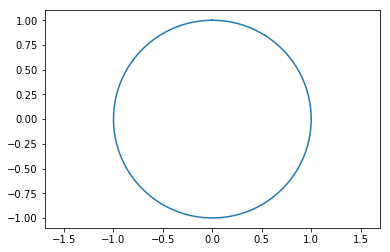

In [ ]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

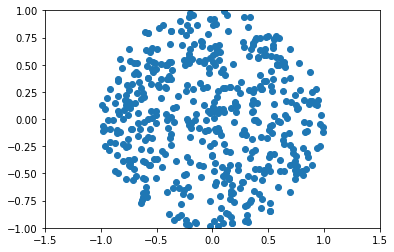

In [387]:
# Solution here
x = np.zeros(1000).reshape(500,2)
#print(x)
for i in range (500):
    r = math.sqrt(random.uniform(0,1))
    phi = random.uniform(0,2*np.pi)
    x[i,0] = r * np.cos(phi)
    x[i,1] = r * np.sin(phi)
plt.scatter(x[:,0],x[:,1])
plt.gca().set(xlim=(-1.5,1.5),ylim=(-1.0,1.0))
plt.show()

### Задача
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

In [376]:
# Solution here
def rw(n): 
    x0=0 
    x1=0 
    sx=np.zeros(100) 
    sy=np.zeros(100) 
    while x0<n/2 and x1<n/2: 
        x=random.randint(0,1) 
        if(x==0): 
            sx[x1+x0]=0 
            x0=x0+1 
        else: 
            sx[x1+x0]=1 
            x1=x1+1 
    if(x0==n/2): 
         while x1<n/2: 
                sx[x1+x0]=1 
                x1=x1+1 
    else: 
        sx[x1+x0]=0 
        x0=x0+1
    x0=0 
    x1=0 
    while x0<n/2 and x1<n/2: 
        x=random.randint(0,1) 
        if(x==0): 
            sy[x1+x0]=0 
            x0=x0+1 
        else: 
            sy[x1+x0]=1 
            x1=x1+1 
    if(x0==n/2): 
        while x1<n/2: 
            sy[x1+x0]=1 
            x1=x1+1 
    else: 
        sy[x1+x0]=0 
        x0=x0+1 
    w=np.zeros((2,100)) 
    for i in range (100): 
        if sx[i]==1: 
            if sy[i]==1: 
                w[0][i]=1 
                w[1][i]=0 
            else: 
                w[0][i]=0 
                w[1][i]=1 
        else: 
            if sy[i]==1: 
                w[0][i]=0 
                w[1][i]=-1 
            else: 
                w[0][i]=-1 
                w[1][i]=0 
    return w

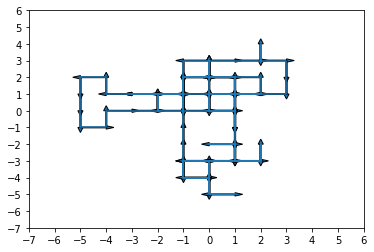

In [380]:
w =rw (100) 
r=np.zeros((2,101)) 
fig, ax=plt.subplots() 
for i in range (100): 
    r[0][i+1]=r[0][i]+w[0][i] 
    r[1][i+1]=r[1][i]+w[1][i] 
    ax.arrow(r[0][i], r[1][i],w[0][i] ,w[1][i] , width=0.05, head_width=0.2)  
plt.plot(r[0,:],r[1,:]) 
plt.xticks(np.arange(-7,7,1)) 
plt.yticks(np.arange(-7,7,1)) 
plt.show()

## Random normal generator

### Задача
Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

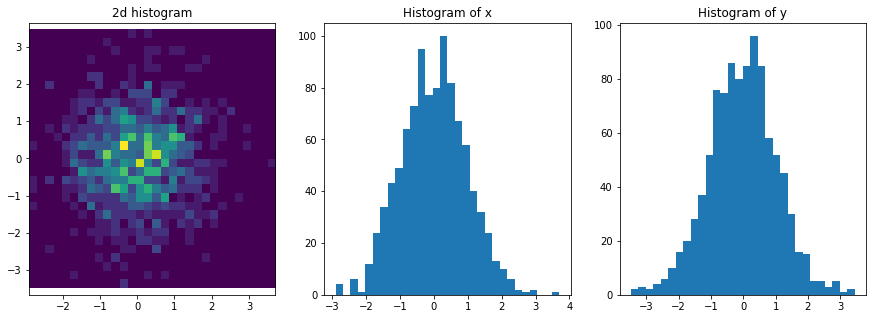

In [ ]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

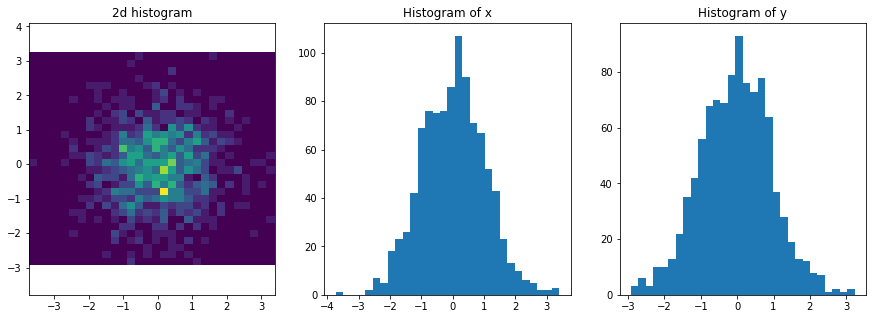

In [112]:
# Solution here
n = 1000
x = np.zeros(1000)
y = np.zeros(1000)
k=0
while k<1000:
    d = random.uniform(-1,1)
    v = random.uniform(-1,1)
    s = d*d+v*v
    if s<=1 and s>0:
        x[k] = d * math.sqrt((-2)*np.log(s)/s)
        y[k] = v * math.sqrt((-2)*np.log(s)/s)
        k = k+1
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

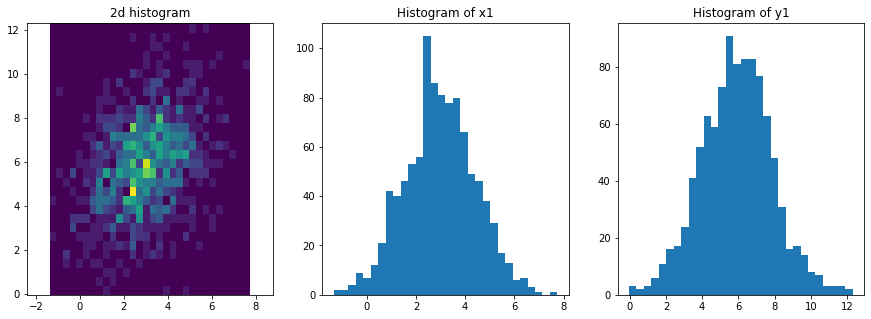

In [113]:
x1=x+y+3 
y1=(1-math.sqrt(7))/2*x+(1+math.sqrt(7))/2*y +6 
fig, ax = plt.subplots(1, 3, figsize=(15, 5)) 
ax[0].hist2d(x1, y1, bins=30) 
ax[0].axis('equal') 
ax[1].hist(x1, bins=30) 
ax[2].hist(y1, bins=30) 
ax[0].set_title("2d histogram") 
ax[1].set_title("Histogram of x1") 
ax[2].set_title("Histogram of y1") 
plt.show()

### Задача
Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.


In [284]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

Переход производится с помощью разложения Холецкого (https://ru.wikipedia.org/wiki/Разложение_Холецкого). Если найти матрицу L, тч L * L^T = B, то матрица L даст преобразование исходных восьми величин (для всех 9 сразу нельзя, так как 9я строка выражается как минус сумма первой и пятой). Затем получим преобразование первых 8ми величин, умножив L на вектор из 8 гауссовских величин. После этого, получим 9ю как - сумму первой и пятой (тк соотв. 9я строка в матрице В есть минус сумма первой и пятой). Таким образом будет получен искомый вектор случайных величин, имеющих ковариационную матрицу В

In [355]:
def multinorm(n):
    a = np.zeros(8*n).reshape(8,n)
    for i in range (8):
        a[i] = np.random.normal(0,1,n)
    return a

In [368]:
N = multinorm(1)
C = np.linalg.cholesky(B[np.arange(8)][:,np.arange(8)])
a = np.zeros(8)+1
a = C.dot(N)
b = np.zeros(9)
for i in range (8):
    b[i] = a[i]
b[8] = -(a[0]+a[4])
print(b)
#print(C.dot(np.transpose(C)))

[ 0.39560376  1.94703125  2.70193477 -1.09124182 -2.31055825  1.4361925
 -0.85049276  0.01059199  1.91495449]


### Задача
С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число $\pi$. Теоретически обоснуйте необходимое число бросаний, чтобы оценить число $\pi$ с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.


Если выписать асимптотический доверительный интервал, оценивая матожидание индикатора того что одна точка попала в круг, то при вероятности 0.99 получим что теоретически нужно n > (1000 * pi/2 * (1-pi/4) * 2.576)^2 = 754 046
Но понятно что практически такое число не подойдет, поскольку ранддомайзер не так и случаен. 
Возьмём 70000000 для практической оценки

In [384]:
# Solution here
n = 70000000
count = 0
for i in range (n):
    d = random.uniform(-1,1)
    v = random.uniform(-1,1)
    r = d*d + v*v
    if r <= 1:
        count = count +1
print(4*count/n)

3.1413042285714288


### Задача

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов. 

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [226]:
def Cnk (n,k):
    if k == 0:
        return 1
    else:
        return (math.factorial(n)/(math.factorial(k)*math.factorial(n-k)))

In [235]:
def stirl(m,n):
    a = 0.0
    if m == 0 and n == 0:
        return 1
    if m == 0:
        return 0
    if n == 1:
        return 1
    for k in range (n):
        a += pow((-1),k) * Cnk(n,k) * pow(n-k,m)
    a = a / math.factorial(n)
    return a
print(stirl(6,4))

65.0


In [286]:
def Bell(n):
    a = 0
    if n == 1:
        return 1
    for i in range (n):
        a = a+ stirl(n,i)
    return a+1
print(Bell(7))

877.0


In [287]:
def func (n):
    A = np.zeros(n+1)
    for i in range (n):
        A[i] = pow(i,n)/(Bell(n)*math.factorial(i)*math.e)
    s=np.sum(A)
    A[n] = 1 - s
    K = np.random.choice(n+1,p = A)
#K = np.sum(A)
    return K

In [283]:
a = 0
k = 10
for i in range (k):
    a +=func(100)
a = a /k
print(a)

29.2


Получается примерно 29, так что примерно столько и будет подмножеств в случайном разбиении при n=100